In [1]:
import os
from keras.models import load_model

model = load_model('oral_VGG19.h5')

In [2]:
base_dir = "dataset_split/"
test_dir = os.path.join(base_dir, 'test')
classes = ['gigi calculus','gigi caries','gigi discoloration','gigi gingivitis', 'gigi hypodontia', 'gigi sehat',
           'lidah fissure', 'lidah geografis','lidah kanker', 'lidah leukoplakia','lidah putih', 'lidah sehat']

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 24,
    class_mode = 'categorical',
    shuffle = False,
)

Found 683 images belonging to 12 classes.


In [5]:
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, confusion_matrix, classification_report
import seaborn as sns
import numpy as np

sns.set(style='whitegrid')

testLab = test_generator.classes
pred = model.predict(test_generator)
y_pred = np.argmax(pred, axis=-1)
class_names = test_generator.class_indices

print(classification_report(y_pred, testLab, target_names=class_names))

29/29 [==============================] - 12s 227ms/step
                    precision    recall  f1-score   support

     gigi calculus       0.83      0.64      0.73       101
       gigi caries       0.81      0.95      0.87        57
gigi discoloration       0.91      0.85      0.88        61
   gigi gingivitis       0.59      0.76      0.66        54
   gigi hypodontia       0.97      0.97      0.97        70
        gigi sehat       1.00      1.00      1.00        75
     lidah fissure       1.00      1.00      1.00        50
   lidah geografis       1.00      0.97      0.99        40
      lidah kanker       1.00      1.00      1.00        43
 lidah leukoplakia       0.97      1.00      0.99        34
       lidah putih       0.96      1.00      0.98        46
       lidah sehat       1.00      0.98      0.99        52

          accuracy                           0.90       683
         macro avg       0.92      0.93      0.92       683
      weighted avg       0.91      0.90   

In [39]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: C:\Users\Akram\AppData\Local\Temp\tmpmfcvo5ht\assets


INFO:tensorflow:Assets written to: C:\Users\Akram\AppData\Local\Temp\tmpmfcvo5ht\assets


In [40]:
# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [6]:
from PIL import Image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

1/1 [==============================] - 0s 32ms/step
tuning/gigi sehat/gigisehat5.jpg
0
1
2
3
4
gigi hypodontia (Probability: 1.000)
5
6
7
8
9
10
11


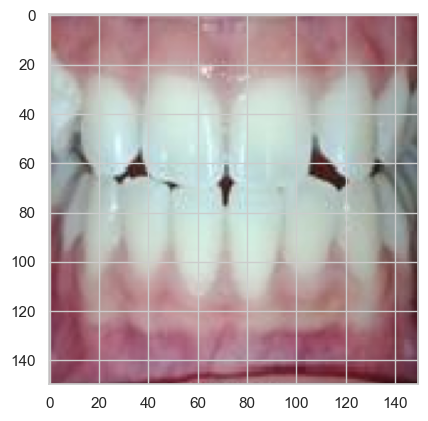

In [38]:
path = "tuning/gigi sehat/gigisehat5.jpg"
img = image.load_img(path, target_size=(150, 150))
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
image_class = model.predict(images, batch_size=24)

print(path)

for i in range(len(classes)):
    print(i)
    if image_class[0, i] > 0:
        print(f'{classes[i]} (Probability: {image_class[0, i]:.3f})')

if np.max(image_class) == 0:
    print('Not defined')